In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Per ogni emozione evidenzio quale feature ha avuto il punteggio massimo in un determinato modello di ML

In [2]:
print('Logistic regression')
logistic_df = pd.read_csv('logistic_regression/f1_score.csv', header=[0,1], index_col=[0,1])
logistic_df = logistic_df.drop(columns=['tilted','frontal'], level=1)
logistic_df = logistic_df.drop(index=['macro_avg', 'weighted_avg'], level=0).reset_index(level=0, drop=True)
display(logistic_df.style.highlight_max(color='lightgreen', axis=1).format('{:.2f}'))

Logistic regression


features,delaunay,au_intensities,au_activations,au_intensities_activations
pose,none,none,none,none
emotion,,,,
anger,0.33,0.32,0.35,0.35
disgust,0.30,0.31,0.27,0.27
fear,0.17,0.15,0.16,0.18
happiness,0.59,0.65,0.69,0.66
sadness,0.24,0.33,0.32,0.30
surprise,0.47,0.45,0.47,0.52
valence,0.52,0.67,0.64,0.66


In [3]:
print('Linear SVM')
linear_df = pd.read_csv('linear_SVM/f1_score.csv', header=[0,1], index_col=[0,1])
linear_df = linear_df.drop(columns=['tilted','frontal'], level=1)
linear_df = linear_df.drop(index=['macro_avg', 'weighted_avg'], level=0).reset_index(level=0, drop=True)
linear_df.style.highlight_max(color='lightgreen', axis=1).format('{:.2f}')

Linear SVM


features,delaunay,au_intensities,au_activations,au_intensities_activations
pose,none,none,none,none
emotion,,,,
anger,0.37,0.37,0.35,0.35
disgust,0.32,0.37,0.23,0.31
fear,0.14,0.16,0.15,0.17
happiness,0.61,0.66,0.67,0.66
sadness,0.30,0.32,0.34,0.32
surprise,0.46,0.45,0.47,0.51
valence,0.55,0.65,0.64,0.63


In [4]:
print('Kernel SVM')
kernel_df = pd.read_csv('kernel_SVM/f1_score.csv', header=[0,1], index_col=[0,1])
kernel_df = kernel_df.drop(columns=['tilted','frontal'], level=1)
kernel_df = kernel_df.drop(index=['macro_avg', 'weighted_avg'], level=0).reset_index(level=0, drop=True)
kernel_df.style.highlight_max(color='lightgreen', axis=1).format('{:.2f}')

Kernel SVM


features,delaunay,au_intensities,au_activations,au_intensities_activations
pose,none,none,none,none
emotion,,,,
anger,0.35,0.35,0.28,0.32
disgust,0.31,0.33,0.24,0.28
fear,0.16,0.14,0.11,0.15
happiness,0.51,0.56,0.67,0.64
sadness,0.32,0.25,0.29,0.34
surprise,0.42,0.38,0.44,0.42
valence,0.49,0.56,0.65,0.49


In [5]:
print('LSTM')
lstm_df = pd.read_csv('LSTM/f1_score.csv', header=0, index_col=[0,1], names=['au_intensities', 'au_activations', 'au_intensities_activations'], skiprows=[0])
lstm_df = lstm_df.drop(index=['macro_avg', 'weighted_avg'], level=0).reset_index(level=0, drop=True)
lstm_df.style.highlight_max(color='lightgreen', axis=1).format('{:.2f}')

LSTM


,au_intensities,au_activations,au_intensities_activations
anger,0.39,0.38,0.34
disgust,0.29,0.29,0.32
fear,0.19,0.17,0.18
happiness,0.53,0.66,0.62
sadness,0.31,0.27,0.30
surprise,0.39,0.33,0.37
valence,0.48,0.60,0.63


Tabella finale con lo score massimo di ogni modello

In [6]:
df_list = [logistic_df, linear_df, kernel_df, lstm_df]
max_values_list = []
for df in df_list:
    max_values_list.append(df.max(axis=1))

score_df = pd.concat(max_values_list, axis=1, sort=False)
score_df = score_df.T.rename(index={0:'logistic_regression', 1:'linear_SVM', 2:'kernel_SVM', 3:'LSTM'})
display(score_df.style.highlight_max(color = 'lightgreen').format('{:.2f}'))

,anger,disgust,fear,happiness,sadness,surprise,valence
logistic_regression,0.35,0.31,0.18,0.69,0.33,0.52,0.67
linear_SVM,0.37,0.37,0.17,0.67,0.34,0.51,0.65
kernel_SVM,0.35,0.33,0.16,0.67,0.34,0.44,0.65
LSTM,0.39,0.32,0.19,0.66,0.31,0.39,0.63


## Confronto con dummy classifier

Concateno la media pesata dell'f1_score di ogni modello rispetto ad ogni emozione

In [7]:
csv_list = ['dummy_classifier/f1_score.csv','logistic_regression/f1_score.csv','linear_SVM/f1_score.csv','kernel_SVM/f1_score.csv']
df_list = []

for csv in csv_list:
    df = pd.read_csv(csv, header=[0,1], index_col=[0,1])
    df_list.append(df)
    
for i, df in enumerate(df_list):
    df = df.drop(columns=['tilted','frontal'], level=1)
    df = df.drop(index=['macro_avg', 'weighted_avg'], level=0).reset_index(level=0, drop=True)
    df_list[i] = df

df = pd.read_csv('LSTM/f1_score.csv', index_col=[0,1], skiprows=[1])
df = df.drop(index=['macro_avg', 'weighted_avg'], level=0).reset_index(level=0, drop=True)
df_list.append(df)

df = pd.concat(df_list, axis=1, sort=False)

columns_arrays = [
    ['dummy_classifier','dummy_classifier','dummy_classifier','dummy_classifier','logistic_regression','logistic_regression','logistic_regression','logistic_regression','linear_svm','linear_svm','linear_svm','linear_svm','kernel_svm','kernel_svm','kernel_svm','kernel_svm','lstm','lstm','lstm'],
    ['delaunay','au_intensities','au_activations','au_intensities_activations','delaunay','au_intensities','au_activations','au_intensities_activations','delaunay','au_intensities','au_activations','au_intensities_activations','delaunay','au_intensities','au_activations','au_intensities_activations','au_intensities','au_activations','au_intensities_activations'],
]

columns_index = pd.MultiIndex.from_arrays(columns_arrays, names=['models', 'features'])
index = ['anger','disgust','fear','happiness','sadness','surprise','valence']

label_1_df = pd.DataFrame(data=df.values, index=index, columns=columns_index)
label_1_df

models    dummy_classifier                                \
features          delaunay au_intensities au_activations   
anger                 0.35           0.33           0.32   
disgust               0.27           0.21           0.30   
fear                  0.13           0.17           0.13   
happiness             0.52           0.48           0.50   
sadness               0.21           0.23           0.27   
surprise              0.39           0.36           0.40   
valence               0.56           0.45           0.48   

models                               logistic_regression                 \
features  au_intensities_activations            delaunay au_intensities   
anger                           0.28                0.33           0.32   
disgust                         0.26                0.30           0.31   
fear                            0.10                0.17           0.15   
happiness                       0.47                0.59           0.65   
sadness                         0.25                0.24           0.33   
surprise                        0.39                0.47           0.45   
valence                         0.50                0.52           0.67   

models                                              linear_svm                 \
features  au_activations au_intensities_activations   delaunay au_intensities   
anger               0.35                       0.35       0.37           0.37   
disgust             0.27                       0.27       0.32           0.37   
fear                0.16                       0.18       0.14           0.16   
happiness           0.69                       0.66       0.61           0.66   
sadness             0.32                       0.30       0.30           0.32   
surprise            0.47                       0.52       0.46           0.45   
valence             0.64                       0.66       0.55           0.65   

models                                              kernel_svm                 \
features  au_activations au_intensities_activations   delaunay au_intensities   
anger               0.35                       0.35       0.35           0.35   
disgust             0.23                       0.31       0.31           0.33   
fear                0.15                       0.17       0.16           0.14   
happiness           0.67                       0.66       0.51           0.56   
sadness             0.34                       0.32       0.32           0.25   
surprise            0.47                       0.51       0.42           0.38   
valence             0.64                       0.63       0.49           0.56   

models                                                        lstm  \
features  au_activations au_intensities_activations au_intensities   
anger               0.28                       0.32           0.39   
disgust             0.24                       0.28           0.29   
fear                0.11                       0.15           0.19   
happiness           0.67                       0.64           0.53   
sadness             0.29                       0.34           0.31   
surprise            0.44                       0.42           0.39   
valence             0.65                       0.49           0.48   

models                                               
features  au_activations au_intensities_activations  
anger               0.38                       0.34  
disgust             0.29                       0.32  
fear                0.17                       0.18  
happiness           0.66                       0.62  
sadness             0.27                       0.30  
surprise            0.33                       0.37  
valence             0.60                       0.63

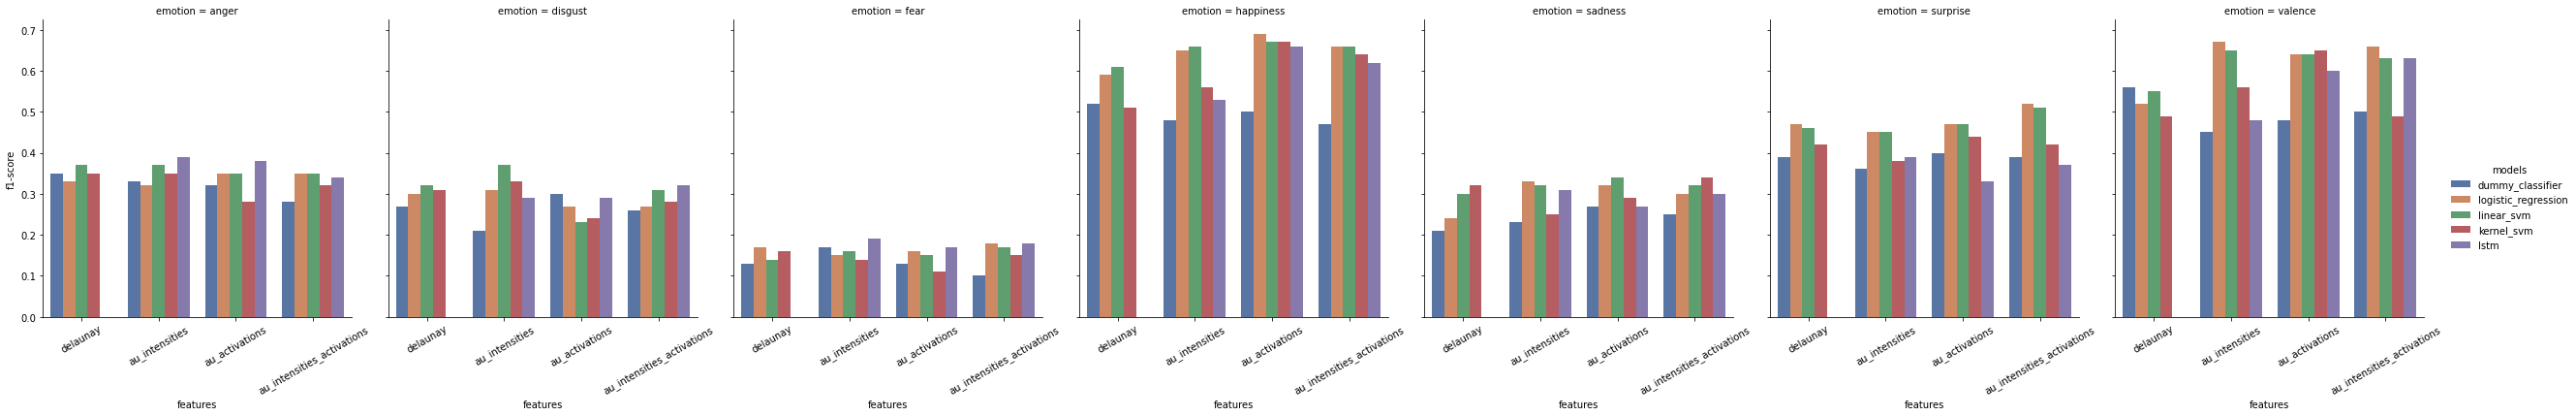

In [8]:
df = label_1_df.reset_index().rename(columns={'index':'emotion'})
df = df.melt(id_vars=['emotion'], value_name='f1-score')
fg = sns.catplot(x='features', y='f1-score', hue='models', col='emotion', kind='bar', palette='deep', data=df)
fg.set_xticklabels(rotation=30)
plt.show()

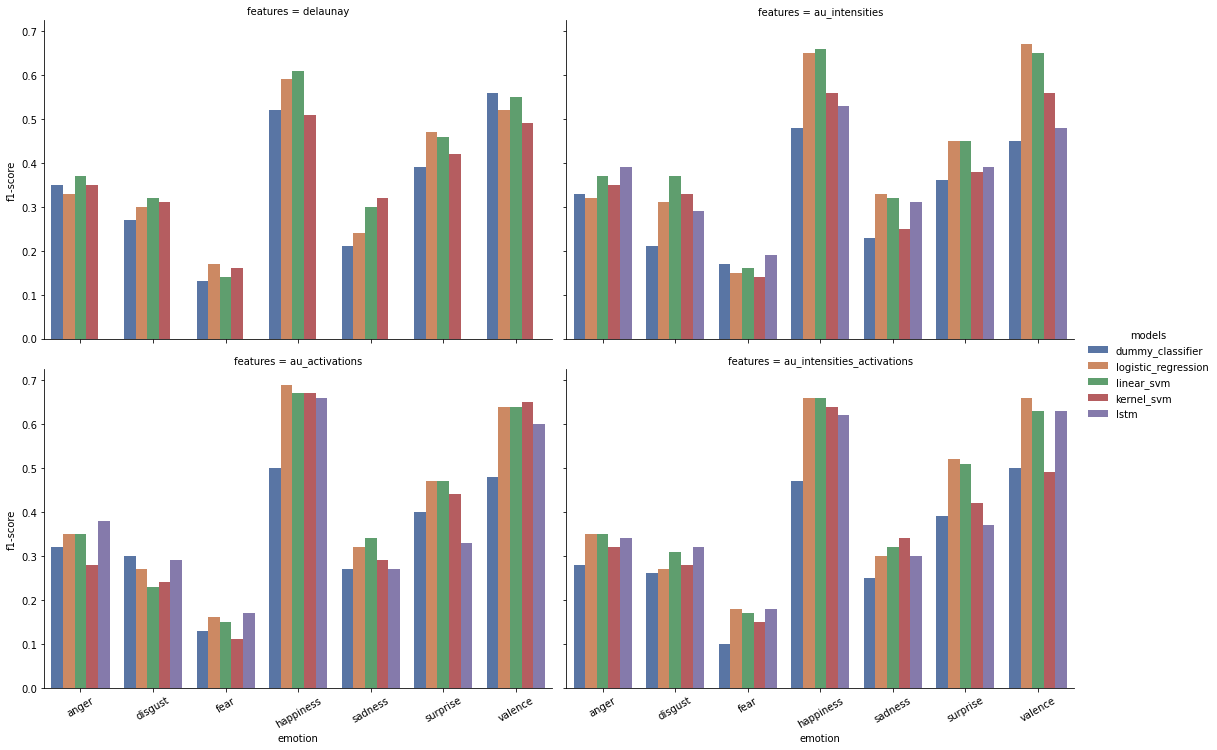

In [9]:
fg = sns.catplot(x='emotion', y='f1-score', hue='models', col='features', kind='bar', palette='deep', col_wrap=2, data=df, aspect=1.5)
fg.set_xticklabels(rotation=30)
plt.show()

## Confronto con il paper

In [10]:
columns = ['anger','disgust','fear','happiness','sadness','surprise','valence']
data = np.array([[0.38, 0.31, 0.15, 0.68, 0.31, 0.52, 0.70]])
paper_df = pd.DataFrame(data=data, columns=columns, index=['baseline'])
paper_df

,anger,disgust,fear,happiness,sadness,surprise,valence
baseline,0.38,0.31,0.15,0.68,0.31,0.52,0.7


,logistic_regression,linear_svm,kernel_svm,lstm,baseline
anger,0.35,0.37,0.28,0.34,0.38
disgust,0.27,0.37,0.24,0.32,0.31
fear,0.18,0.16,0.11,0.18,0.15
happiness,0.66,0.66,0.67,0.62,0.68
sadness,0.30,0.32,0.29,0.30,0.31
surprise,0.52,0.45,0.44,0.37,0.52
valence,0.66,0.65,0.65,0.63,0.70


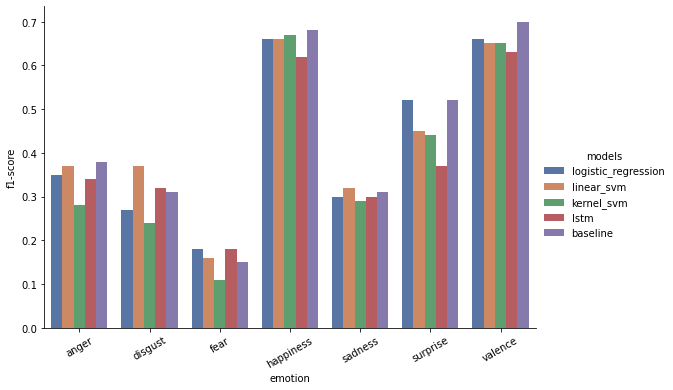

In [11]:
#best_features_df = label_1_df.loc[:,[('logistic_regression','au_activations'),('linear_svm', 'au_intensities'),('kernel_svm','au_activations'),('lstm','au_intensities_activations')]]
best_features_df = label_1_df.loc[:,[('logistic_regression','au_intensities_activations'),('linear_svm', 'au_intensities'),('kernel_svm','au_activations'),('lstm','au_intensities_activations')]]
all_models_df = pd.concat([best_features_df.droplevel(1, axis=1), paper_df.T], axis=1)
display(all_models_df.style.highlight_max(color='lightgreen', axis=1).format('{:.2f}'))

melted_df = all_models_df.reset_index().rename(columns={'index':'emotion'}).melt(id_vars='emotion', var_name='models', value_name='f1-score')
fg = sns.catplot(x='emotion', y='f1-score', hue='models', kind='bar', palette='deep', data=melted_df, aspect=1.5)
fg.set_xticklabels(rotation=30)
plt.show()